# illustrates the use of the `proxy`, `analogs` and `scalar_plot` classes

In [42]:
%matplotlib inline

In [43]:
import os 
import sys
import pathlib

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [45]:
sys.path.insert(0, '../')

In [46]:
from paleopy import proxy 
from paleopy import analogs
from paleopy.plotting import scalar_plot

### determine the current working directory 

In [47]:
cwd = pathlib.Path.cwd() 

In [48]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


### example 1: defines one proxy

#### defines the folder where the JSON files are (for the datasets) and where to save the proxy JSON files

In [49]:
djsons = cwd.parent / 'jsons'

In [50]:
pjsons = djsons / 'proxies'

In [51]:
if not djsons.exists(): 
    djsons.mkdir()

In [52]:
if not pjsons.exists(): 
    pjsons.mkdir()

### instantiates a proxy instance, the list of valid datasets + variables is below

+ **vcsn**: 
    + TMean 
    + Rain
+ **ersst**: 
    + sst
+ **gpcp**: 
    + Rain
+ **ncep**: 
    + hgt_1000
    + hgt_850
    + hgt_200
    + omega_500 
    + uwnd_1000
    + vwnd_1000 
    + uwnd_850
    + vwnd_850 
    + uwnd_200
    + vwnd_200

## the list of valid attributes are defined in the help of the proxy class 

In [53]:
print(proxy.__doc__)


    base class for a single proxy

    Parameters
    ----------

    sitename : string
            The name of the proxy site
            user-defined, no default

    proxy_type : string
            the type of proxy
            can be e.g.:
            "Tree-ring"
            "Speleotheme"
            "Coral core"
            user-defined, no default

    lon : float
            The longitude (in decimal degrees) of the site
            user-defined, no default

    lat : float
            The latitude (in decimal degrees) of the site
            user-defined, no default

    djsons : string
            The path to the json files defining the paths
            and parameters arrached to each dataset + variable
            defined by the frontend in PICT, default is ./jsons

    pjsons : string
            The path where to save the individual proxy json files
            defined by the frontend in PICT, default is ./jsons/proxies

    pfname : string
            the name of the JSO

### the cell below instantiates a correct proxy instance by passing all the relevant parameters 

In [54]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          qualitative = 0, \
          calc_anoms = 1, \
          detrend = 1, \
        method = 'quintiles')

### the first step is to find the analog seasons, by calling the `find_analogs` method 

In [55]:
p.find_analogs()

### now the proxy instance `p` contains attributes that hold the results of the `find_analogs` method, and we can print the information about the proxy and the derived information related to the extraction

In [56]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'slope': 0.030535947029886677, 'intercept': -60.96501637775516}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


### you can access any of these attributes individually, e.g. those are the extracted analog years

In [57]:
p.analog_years

Int64Index([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype='int64', name='time')

### and these are the weights associated with each analog year 

In [58]:
p.weights

array([0.1564548 , 0.12800536, 0.13090508, 0.16334635, 0.15762466,
       0.12200295, 0.14166079])

In [59]:
p.weights.sum()

0.9999999999999999

### `analogs` is an attribute of the proxy: it's a `pandas` dataframe containing info about the analog years 

In [60]:
p.analogs

,d_anomalies,cat,weights
time,,,
1982-02-15,0.638992,WA,0.156455
1997-02-15,0.747619,WA,0.128005
1999-02-15,0.736547,WA,0.130905
2000-02-15,0.612678,WA,0.163346
2001-02-15,0.565475,WA,0.157625
2006-02-15,0.429462,WA,0.122003
2009-02-15,0.504521,WA,0.141661


### you can save this if you want into a csv file, by calling the `to_csv` method of a pandas dataframe

In [61]:
p.sitename

'Rarotonga'

In [62]:
filename = cwd.parent / (p.sitename + '_analogs.csv')

In [63]:
filename

PosixPath('/home/nicolasf/research/PICT_notebooks/Rarotonga_analogs.csv')

In [64]:
p.analogs.to_csv(filename)

In [65]:
!ls -lt {filename}

-rw-rw-r-- 1 nicolasf nicolasf 397 Jun 21 09:01 /home/nicolasf/research/PICT_notebooks/Rarotonga_analogs.csv


### Adding `outfile=True` creates the json file containing the proxy information, with filename `self.pfname`, this needs to be executed if you want to persist the proxy metadata and e.g. use it in an ensemble  

In [66]:
p.proxy_repr(pprint=False, outfile=True)

In [67]:
!ls -lt ../jsons/proxies/Rarotonga.json

-rw-rw-r-- 1 nicolasf nicolasf 771 Jun 21 09:01 ../jsons/proxies/Rarotonga.json


### plot the seasonal time-series of anomalies and overlays the analog years

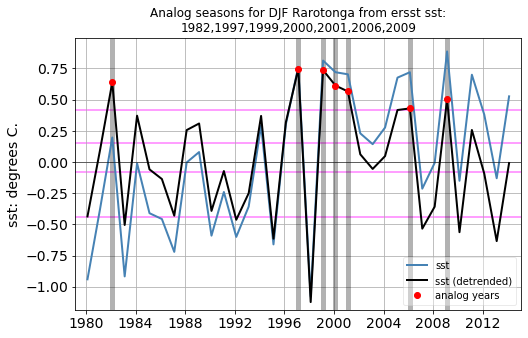

In [68]:
f = p.plot()

### if you want to save the figure, provide a directory and filename, let's create a 'figures' directory in the 'PICT_notebooks' directory 

In [69]:
fpath = cwd.parent / 'figures'

In [70]:
if not fpath.exists(): 
    fpath.mkdir()

In [71]:
filename = fpath / (p.sitename + '_proxy_time_series.png')

In [72]:
f.savefig(filename)

In [73]:
!ls -ltr {filename}

-rw-rw-r-- 1 nicolasf nicolasf 62312 Jun 21 09:01 /home/nicolasf/research/PICT_notebooks/figures/Rarotonga_proxy_time_series.png


### Now you can instantiate an object of the class 'analog', by passing the dataset and variable you want to calculate the composite anomalies for 

In [74]:
print(analogs.__doc__)


    base class for analogs calculations,
    takes either a `proxy` or `ensemble` instance

    Parameters
    ----------

    dataset : string
            The name of the dataset for which the composite are to be calculated
            e.g. ['ersst','ncep','vcsn','gpcp']

    variable : string
            The name of the variable to consider for calculing the composite
            e.g. for 'ersst', it's 'sst', for 'ncep', can be ['hgt_1000',
            'hgt_850', etc]
    


In [75]:
compos = analogs(p, 'ncep', 'hgt_1000')

### once it is instantiated, the object `compos` inherit some of the attributes of the proxy defined above 

In [76]:
compos.analog_years

Int64Index([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype='int64', name='time')

In [77]:
compos.season

'DJF'

### you can the call the `composite` method, which will do all the calculations in order to get the composite anomalies associated with  the analog years, this method can be called without any parameters, in which case they will take the defaults 

### note that by default the anomalies for each year are **NOT** weighted, if you want the weights calculated from the proxy to be applied, then you need to pass `weighting = True`

In [78]:
compos.composite?

Signature:
compos.composite(
    climatology=(1981, 2010),
    test=True,
    repeats=True,
    weighting=False,
)
Docstring:
calculates the composite anomalies (and the Student t-test)
from the seasonal values

Parameters
----------

climatology : tuple (start_year, end_year)
        The climatological period

test : Boolean (default = True)
        Whether to calculate the Student T-test (p-value)

repeats : Boolean (default = False)
        whether to include the repeated years
        only applies when an `ensemble` object is passed to
        the analog class, where some years can be sampled
        repeatedly

weigthing : Boolean (default = False)
        if True, calculate the composite anomaly
        weigthed by the inverse absolute difference between
        the proxy value and the analog seasons values
File:      ~/research/PICT_notebooks/paleopy/core/analogs.py
Type:      method


In [79]:
compos.composite()

In [80]:
compos.composite(weighting=True)

### now there is a `dset` attribute associated to the `compos` instance, which contains the 

In [ ]:
compos.dset

In [ ]:
compos.dset['composite_anomalies'].plot()

In [ ]:
from cartopy import crs as ccrs

In [ ]:
from cartopy.util import add_cyclic_point

In [ ]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### if the field is global, you might need to wrap the longitudes 

In [86]:
def wrap_longitudes(data_array):
    import xarray as xr
    from cartopy.util import add_cyclic_point
    lat = data_array.coords['latitudes']
    lon = data_array.coords['longitudes']
    data = data_array.data
    wrap_data, wrap_lon = add_cyclic_point(data, coord=lon)
    data_array = xr.DataArray(wrap_data, dims=('latitudes','longitudes'), coords=[lat, wrap_lon])
    return data_array

### wraps the longitudes 

In [87]:
composite_anomalies = wrap_longitudes(compos.dset['composite_anomalies'])

In [88]:
pvalues = wrap_longitudes(compos.dset['pvalues'])

In [91]:
import cartopy
from cartopy import crs as ccrs

In [98]:
import palettable

In [99]:
cmap = eval(compos.dset_dict['plot']['cmap'])

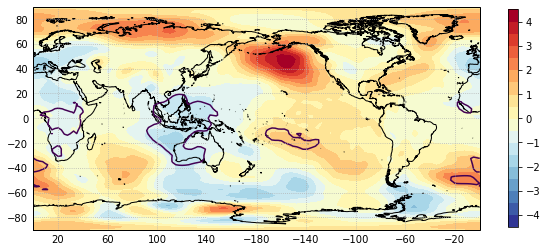

In [134]:
f, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})

composite_anomalies.plot.contourf(ax=ax, levels=20, transform=ccrs.PlateCarree(central_longitude=0), cmap=cmap, cbar_kwargs={'shrink':0.5})

pvalues.plot.contour(levels=[0.05], transform=ccrs.PlateCarree(central_longitude=0))

ax.coastlines(resolution='50m')

# ax.set_extent([165, 180, -50., -30])

gl = ax.gridlines(linestyle=":", draw_labels=True, crs=ccrs.PlateCarree(central_longitude=0), xlocs=np.arange(-180, 180, 40))

gl.xlabels_top = False
gl.ylabels_right = False

### saves the dataset containing all the field composite results to file 

In [136]:
ncpath = cwd.parent / 'netcdfs'

In [137]:
if not ncpath.exists(): 
    ncpath.mkdir()

In [138]:
filename = ncpath / (p.sitename + '_proxy_composite.nc')

In [139]:
compos.save_to_file(filename)

In [140]:
!ls -ltr {filename}

-rw-rw-r-- 1 nicolasf nicolasf 766488 Jun 21 09:30 /home/nicolasf/research/PICT_notebooks/netcdfs/Rarotonga_proxy_composite.nc
